In [72]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/OCEN_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/OCEN/filter="+str(filter_size)+"/"

# Phase zero: Build classifier for each author group plots

In [73]:
# --------------- load result --------------- #
pp_text_emb = ["tf", "tf_idf", "lsa", "pv_dm", "pv_dbow"]
pp_citation_emb = ["off","n2v"]
author_group = []
NB_result = []
SVM_result = []
LR_result = []
prevent_repeat_load = []
for text_emb in pp_text_emb:
    for citation_emb in pp_citation_emb:
        if text_emb is "off" and citation_emb is "off":
            break
        if text_emb is "tf" or text_emb is "tf_idf":
            citation_emb="off"
        result_filename = "citation="+citation_emb+"_textual="+text_emb+"_threshold="+str(filter_size)+".csv"
        if result_filename in prevent_repeat_load:
            break
        print(text_emb+" "+citation_emb)
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        prevent_repeat_load.append(result_filename)
        # save result in array
        author_group.append(result["Name Group"].values)
        if text_emb is "tf":
            NB_result.append(result["MNB macro F1"].values)
        SVM_result.append(result["svc(linear) macro f1"].values)
        LR_result.append(result["logistic regression macro f1"].values)
        
author_group = list(set(map(tuple, author_group)))
author_group = [name for tup in author_group for name in tup]

tf off
tf_idf off
lsa off
lsa n2v
pv_dm off
pv_dm n2v
pv_dbow off
pv_dbow n2v


In [74]:
clf_methods = ["SVM","LR"]
embedding_methods = ["TF","TF-IDF","LSA", "LSA&n2v","PV-DM","PV-DM&n2v","PV-DBOW","PV-DBOW&n2v"]

In [75]:
#-------------- reformate result -------------- #
all_result_clfwise = []
all_result_clfwise.append(SVM_result)
all_result_clfwise.append(LR_result)

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.9838043386627253
0.9835407314727989
0.9664907227145559
0.9607107809155462
0.9377820643691633
0.9697109088646343
0.979122524409487
0.9838238630946758


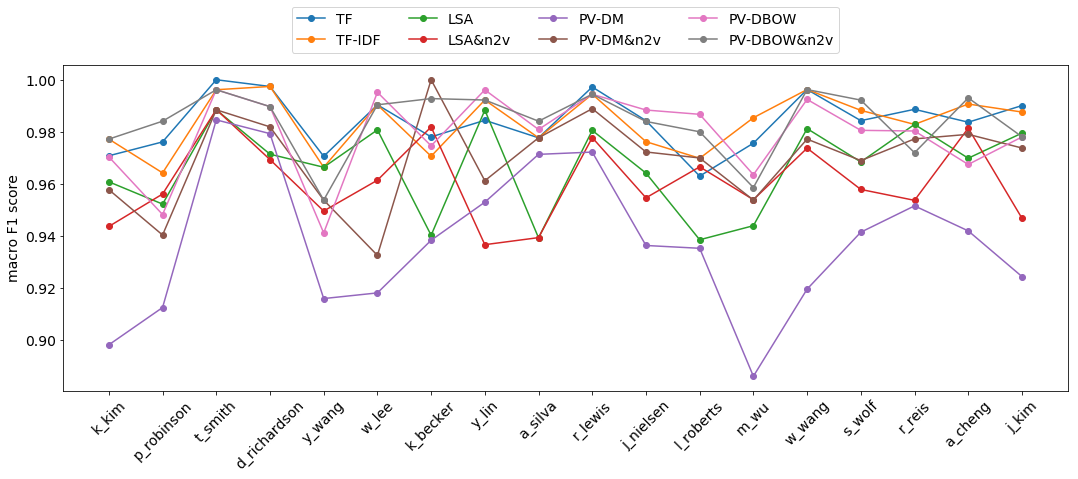

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.9701928573339769
0.9664816792883997
0.9434331846723659
0.9660411921371431
0.9618473511451661
0.9824186808326884
0.9861220961580646
0.9891063840439034


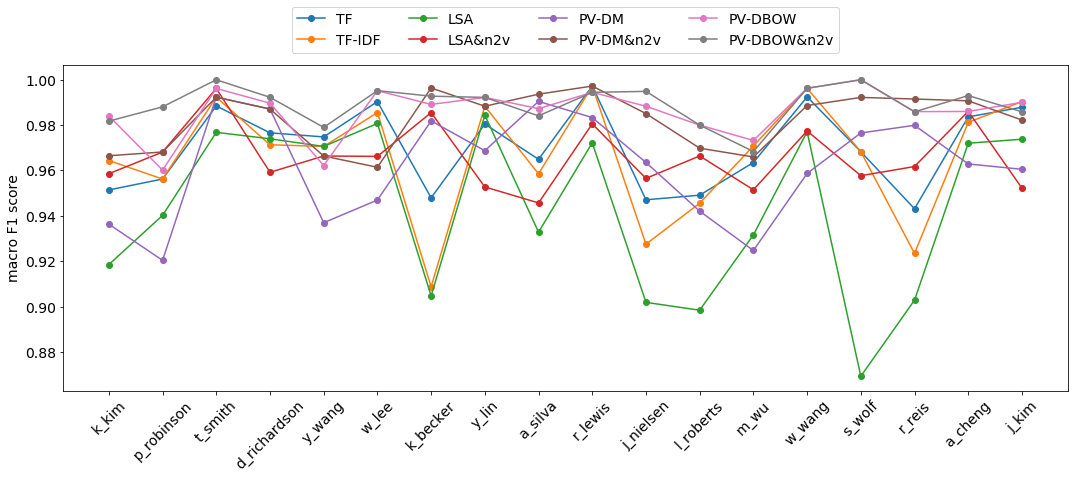

In [76]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (18, 6)

for idx, (result,method) in enumerate(zip(all_result_clfwise,clf_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(embedding_methods)
    for emb,emb_label in zip(result, embedding_methods):
        print(np.mean(emb))
        axs.plot(emb, marker='o',label=emb_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        plt.savefig(filename=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(filename=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

In [77]:
#--------- reformate ------------- #
all_result_embeddingwise=list(zip(*all_result_clfwise))
#print(all_result_embeddingwise)

TF
(array([0.97079601, 0.97611676, 1.        , 0.99741858, 0.97058772,
       0.99036234, 0.97804181, 0.98442535, 0.97769592, 0.99721963,
       0.98427632, 0.96298017, 0.97563134, 0.99624496, 0.98428571,
       0.98863805, 0.98368845, 0.99006897]), array([0.95141988, 0.95623273, 0.98845039, 0.97659971, 0.97478992,
       0.99036234, 0.94795009, 0.98047138, 0.96492511, 0.99721963,
       0.94707633, 0.94910226, 0.96351268, 0.9924359 , 0.9682924 ,
       0.94312362, 0.98362947, 0.9878776 ]), array([0.97526845, 0.95623273, 0.99230991, 0.97397468, 0.97898826,
       0.97114317, 0.86310361, 0.99221267, 0.97132333, 0.99721963,
       0.76437911, 0.96641253, 0.94131022, 0.76757576, 0.9140126 ,
       0.53491221, 0.90498169, 0.96280926]))
['SVM', 'LR', 'NB']
SVM
0.9838043386627253
LR
0.9701928573339769
NB
0.912676100090152


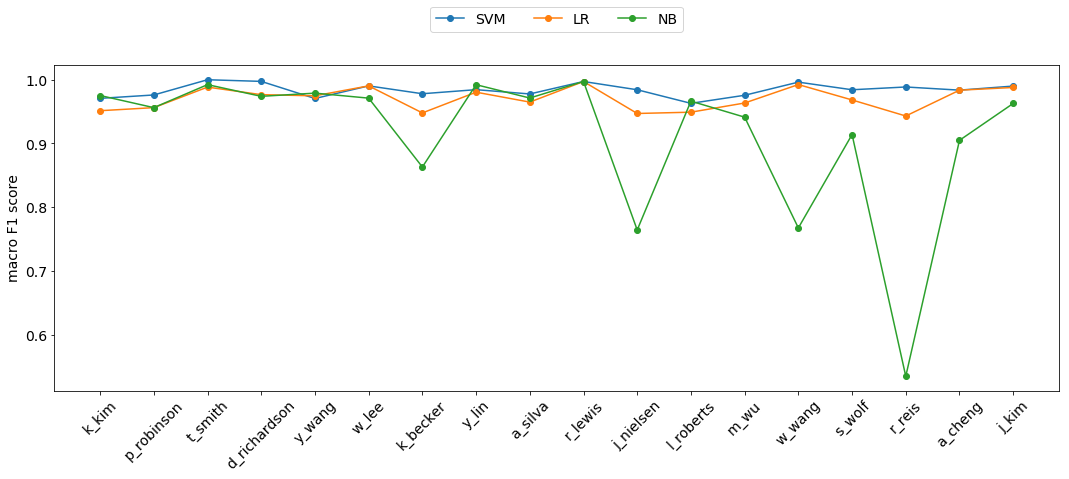

TF-IDF
SVM
0.9835407314727989
LR
0.9664816792883997


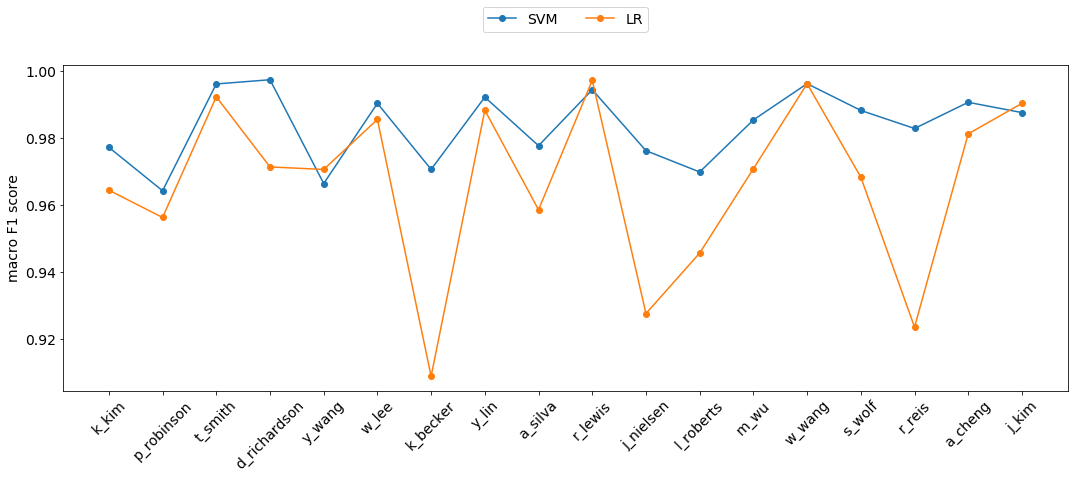

LSA
SVM
0.9664907227145559
LR
0.9434331846723659


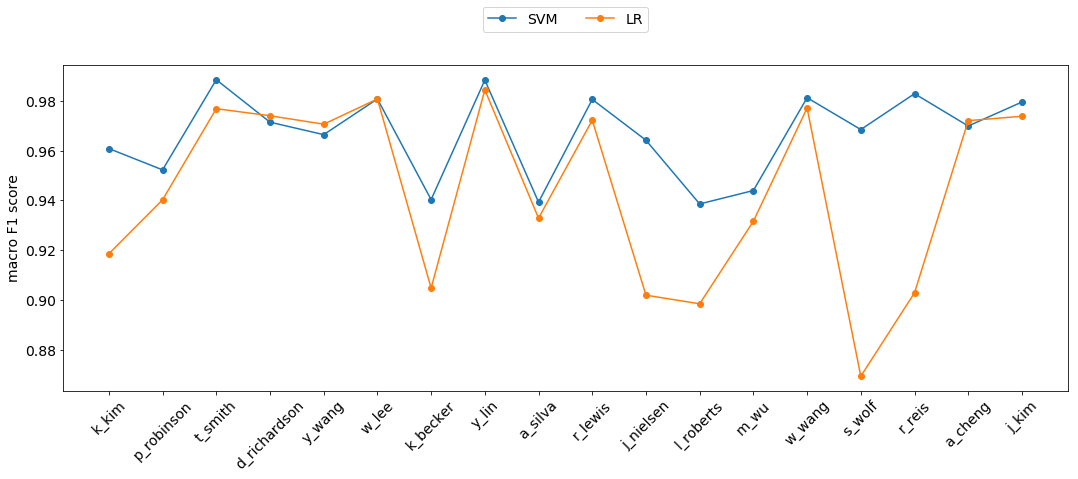

LSA&n2v
SVM
0.9607107809155462
LR
0.9660411921371431


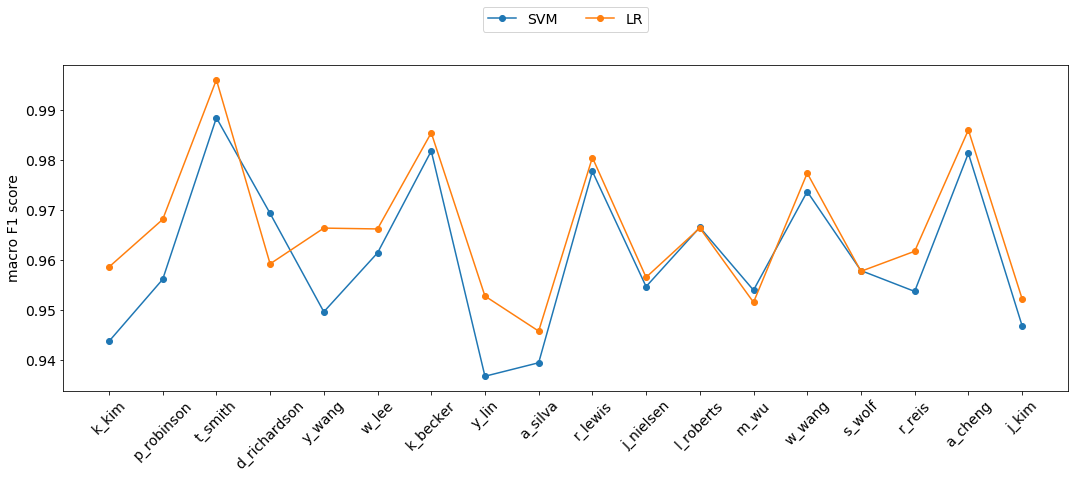

PV-DM
SVM
0.9377820643691633
LR
0.9618473511451661


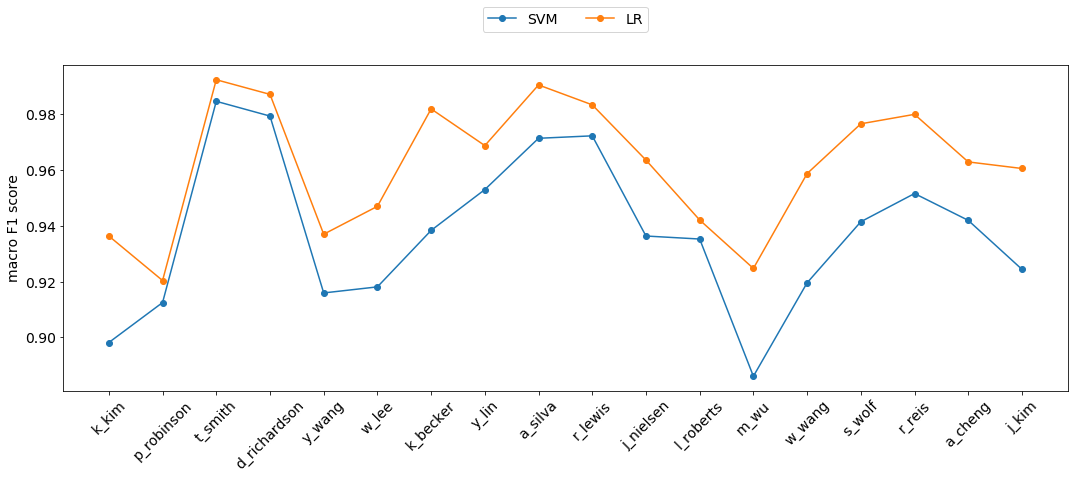

PV-DM&n2v
SVM
0.9697109088646343
LR
0.9824186808326884


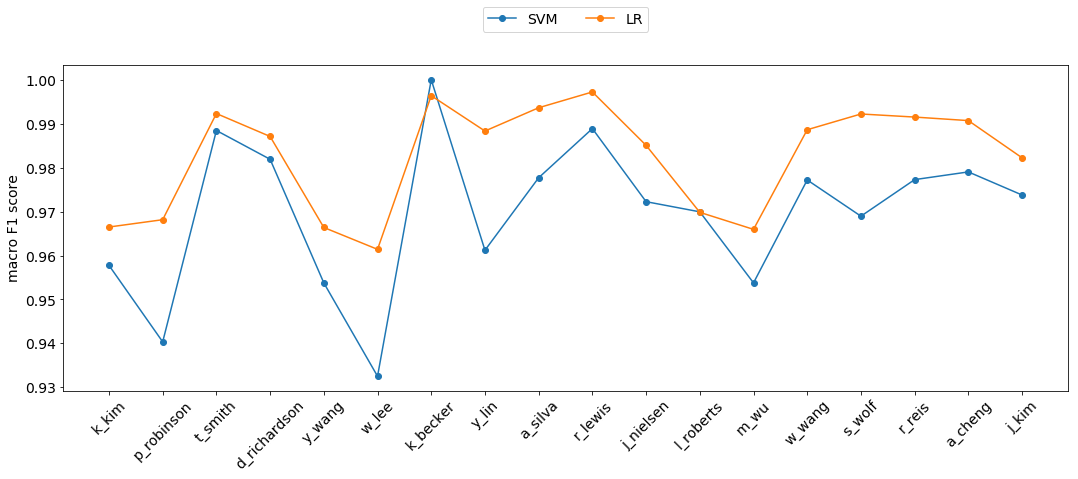

PV-DBOW
SVM
0.979122524409487
LR
0.9861220961580646


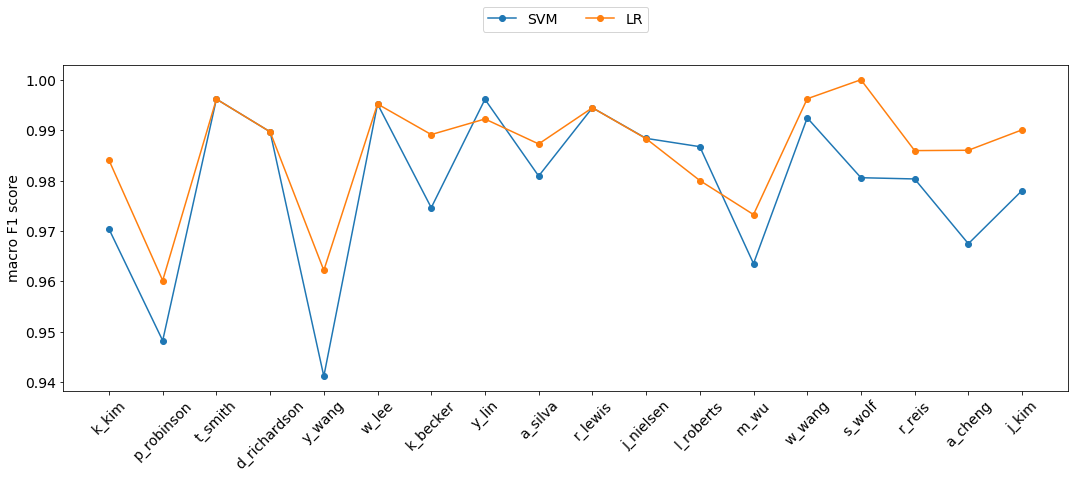

PV-DBOW&n2v
SVM
0.9838238630946758
LR
0.9891063840439034


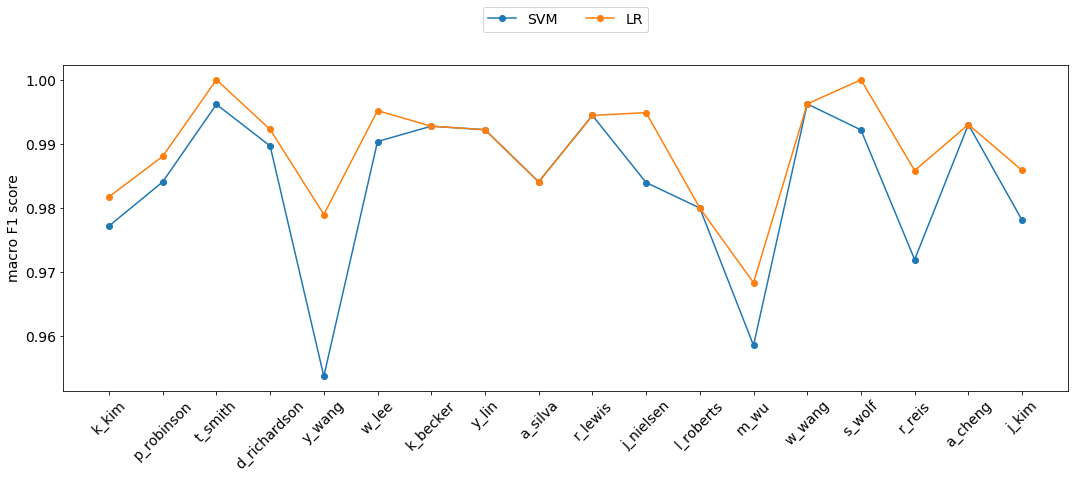

In [78]:
import math
import matplotlib.pyplot as plt

figsize = (18, 6)

for idx, (result,method) in enumerate(zip(all_result_embeddingwise,embedding_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(method)
    # add naive bayes result
    if method is "TF":
        result = result + tuple(NB_result)
        clf_methods.append("NB")
        #print(result)
        #print(clf_methods)
    for clf_result,clf_label in zip(result, clf_methods):
        print(clf_label)
        print(np.mean(clf_result))
        axs.plot(clf_result, marker='o',label=clf_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        plt.savefig(filename=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(filename=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()
    if method is "TF":
        clf_methods.remove("NB")

# Phase one result plot, select best feature

Method: One classifier for each author
1. positive sample will be paper write by this author
2. negative sample will be paper write by other author with same name

Constrains
1. filter is used to select out authors write lots of papers
2. filter of 100 means all authors write more than 100 papers are selected, other authors are not included

In [ ]:
"""# --------------- different feature --------------------- #"""
# --------------- load different feature result ------------ #

all_feature = ['title', 'abstract', 'keywords_mesh', 'text']
filter_change = [100]
# filter_change = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

mnb_all_feature_avg_result = []
lr_all_feature_avg_result = []
svm_all_feature_avg_result = []

mnb_fixed_filter_result = []
lr_fixed_filter_result = []
svm_fixed_filter_result = []
author_name_list = []
# ---------- load different feature ------------------- #
for feature in all_feature:
    result_path = "../../result/"+Dataset+"/binary_global_emb_sample=140k/"
    mnb_avg_result = []
    lr_avg_result = []
    svm_avg_result = []
    # --------------------- load different filter --------------------------- #
    for step_filter in filter_change:
        result_filename = "(Global emb sample 140k) textEmb=tf_feature="+feature+"_filter="+str(step_filter)+"_namegroupcount="+str(total_selected_group)+".csv"
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        # ----------------------- read average result data in --------------------- #
        mnb_avg_result.append(mean(result["MNB F1"].values))
        lr_avg_result.append(mean(result["LR f1"].values))
        svm_avg_result.append(mean(result["SVM f1"].values))
        
    binary_result_only = result[~result["Author"].str[-1].str.isnumeric()]
    # ---------- read result for single filter ----------------- #
    author_name_list = binary_result_only["Author"].values
    mnb_fixed_filter_result.append(binary_result_only["MNB F1"].values)
    lr_fixed_filter_result.append(binary_result_only["LR f1"].values)
    svm_fixed_filter_result.append(binary_result_only["SVM f1"].values)
        
    mnb_all_feature_avg_result.append(mnb_avg_result)
    lr_all_feature_avg_result.append(lr_avg_result)
    svm_all_feature_avg_result.append(svm_avg_result)


In [ ]:
print(author_name_list)
print(mnb_fixed_filter_result)
print(lr_fixed_filter_result)
print(svm_fixed_filter_result)

In [ ]:
'''plot macro f1 with fixed filter 100'''
%matplotlib inline
import matplotlib.pyplot as plt
# ------------------- parameter ------------------ #
label_font = 13

author_name_list = np.array(author_name_list)
#--------------   mnb --------------------------#
# process result into np array
mnb_fixed_filter_result = np.array(mnb_fixed_filter_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, mnb_fixed_filter_result):
    plt.xticks(range(len(result)), author_name_list)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=emb_type)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3,prop={'size': 12})
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_sample=140k_clf=mnb.eps', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')

#-------------- logistic regression --------------------------#
# process result into np array
lr_fixed_filter_result = np.array(lr_fixed_filter_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, lr_fixed_filter_result):
    plt.xticks(range(len(result)), author_name_list)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=emb_type)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3,prop={'size': 12})
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_sample=140k_clf=lr.eps', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')


# -------------------- svm -------------------------------------#
svm_fixed_filter_result = np.array(svm_fixed_filter_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, svm_fixed_filter_result):
    plt.xticks(range(len(result)), author_name_list)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=emb_type)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3,prop={'size': 12})
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_sample=140k_clf=SVM.eps', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')


In [ ]:
print(all_feature)
print(mnb_all_feature_avg_result)
print(lr_all_feature_avg_result)
print(svm_all_feature_avg_result)

In [ ]:
'''plot average macro f1 with different filter'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# ------------------- parameter ------------------ #
label_font = 13

filter_change = np.array(filter_change)
#--------------   mnb --------------------------#
# process result into np array
mnb_all_feature_avg_result = np.array(mnb_all_feature_avg_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, mnb_all_feature_avg_result):
    plt.plot(filter_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('Filter size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_avg_result_sample=140k_clf=mnb.eps', dpi=300)

#-------------- logistic regression --------------------------#
# process result into np array
lr_all_feature_avg_result = np.array(lr_all_feature_avg_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, lr_all_feature_avg_result):
    plt.plot(filter_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('Filter size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_avg_result_sample=140k_clf=lr.eps', dpi=300)


# -------------------- svm -------------------------------------#
svm_all_feature_avg_result = np.array(svm_all_feature_avg_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, svm_all_feature_avg_result):
    plt.plot(filter_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('Filter size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_avg_result_sample=140k_clf=SVM.eps', dpi=300)

# Phase two result plot, select best text embedding


In [ ]:
total_selected_group = 15
train_percent_change = np.arange(0.1,1.1,0.1) # (1 is 100%)
result_path = "../../result/"+Dataset+"/binary_case_only_textEmb_sample=140k/"
all_method = []
lr_all_embedding_mean_result = []
svm_all_embedding_mean_result = []

lr_all_embedding_result = []
svm_all_embedding_result = []

In [ ]:
# -------------- text embedding ----------------- #
text_embedding =["tf", "tf_idf", "lsa", "pv_dm", "pv_dbow"]
citation_embedding = ["off"]

In [ ]:
# ------------- best text embedding -------------- #
text_embedding =["pv_dbow"]
citation_embedding = ["off"]

In [ ]:
# -------------- citation embedding ----------------- #
text_embedding = ["off"]
citation_embedding = ["n2v"]

In [ ]:
# -------------- concatenate embedding ----------------- #
text_embedding = ["lsa", "pv_dm", "pv_dbow"]
citation_embedding = ["n2v"]

In [ ]:
print(text_embedding)
print(citation_embedding)

In [ ]:
from statistics import mean 
# ---------- load different embedding method ------------------- #
author_name_list = []
        
for text_emb in text_embedding:
    for citation_emb in citation_embedding:
        
        if text_emb !="off" and citation_emb!="off":
            all_method.append("("+text_emb+", "+citation_emb+")")
        if text_emb !="off" and citation_emb=="off":
            all_method.append(text_emb)
        if text_emb =="off" and citation_emb!="off":
            all_method.append(citation_emb)
        lr_mean_result = []
        svm_mean_result = []
        
        
        result_filename="(Global emb sample 140k) citationEmb="+citation_emb+"_textEmb="+text_emb+"_filter=100_namegroupcount="+str(total_selected_group)+".csv"
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        # --------------------- load different train_percent --------------------------- #
        for train_percent in train_percent_change:
            curr_train_percent_result = result.loc[result['used_train_percent'] == train_percent]
            lr_mean_result.append(mean(curr_train_percent_result["logistic regression macro f1"].values))
            svm_mean_result.append(mean(curr_train_percent_result["svc(linear) macro f1"].values))
        
        train_100_percent_result = result.loc[result['used_train_percent'] == 1]
        lr_all_embedding_result.append(train_100_percent_result["logistic regression macro f1"].values)
        svm_all_embedding_result.append(train_100_percent_result["svc(linear) macro f1"].values)
        author_name_list = train_100_percent_result["Name Group"].values
        
        lr_all_embedding_mean_result.append(lr_mean_result)
        svm_all_embedding_mean_result.append(svm_mean_result)

In [ ]:
print(all_method)
print(author_name_list)
print(lr_all_embedding_result)
print(svm_all_embedding_result)

# sort result wrt pv-dbow
sorted_lr_idx = []
for emb_type, result in zip(all_method, lr_all_embedding_result):
    if emb_type =="pv_dbow":
        sorted_lr_idx = np.argsort(result)

sorted_lr_all_embedding_result = []
for result in lr_all_embedding_result:
    sorted_lr_all_embedding_result.append(result[sorted_lr_idx])
    
sorted_svm_idx = []
for emb_type, result in zip(all_method, svm_all_embedding_result):
    if emb_type =="pv_dbow":
        sorted_svm_idx = np.argsort(result)
    
sorted_svm_all_embedding_result = []
for result in svm_all_embedding_result:
    sorted_svm_all_embedding_result.append(result[sorted_svm_idx])

sorted_lr_author_name_list = author_name_list[sorted_lr_idx]
sorted_svm_author_name_list = author_name_list[sorted_svm_idx]
print(sorted_lr_author_name_list)
print(sorted_lr_all_embedding_result)
print(sorted_svm_author_name_list)
print(sorted_svm_all_embedding_result)

In [ ]:
''' plot all embedding method with fixed filter (100) on 100% train (binary case only)'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# ------------------- parameter ------------------ #
label_font = 13

#-------------- logistic regression --------------------------#
# process result into np array
sorted_lr_all_embedding_result = np.array(sorted_lr_all_embedding_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, sorted_lr_all_embedding_result):
    plt.xticks(range(len(result)), sorted_lr_author_name_list)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=emb_type)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3)
plt.ylabel('macro f1 score', fontsize=label_font)
#plt.savefig('diff_textEmb_sample=140k_filter=100_clf=lr.eps', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')


# -------------------- svm -------------------------------------#
sorted_svm_all_embedding_result = np.array(sorted_svm_all_embedding_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, sorted_svm_all_embedding_result):
    plt.xticks(range(len(result)), sorted_svm_author_name_list)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=emb_type)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3)
plt.ylabel('macro f1 score', fontsize=label_font)
#plt.savefig('diff_textEmb_sample=140k_filter=100_clf=SVM.eps', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')

In [ ]:
print(all_method)
print(lr_all_embedding_mean_result)
print(svm_all_embedding_mean_result)
print("lr: ")
for method, result in zip(all_method,lr_all_embedding_mean_result):
    print(result[-1])
print("SVM: ")
for method, result in zip(all_method,svm_all_embedding_mean_result):
    print(result[-1])

In [ ]:
''' plot all embedding method with fixed filter (100) on different train size (binary case only)'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# ------------------- parameter ------------------ #
label_font = 13

#-------------- logistic regression --------------------------#
# process result into np array
lr_all_embedding_mean_result = np.array(lr_all_embedding_mean_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, lr_all_embedding_mean_result):
    plt.plot(train_percent_change, result, label=emb_type)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
plt.xlabel('Train sample percentage', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
#plt.savefig('diff_train_percent_CombinedEmb_sample=140k_clf=lr.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')


# -------------------- svm -------------------------------------#
svm_all_embedding_mean_result = np.array(svm_all_embedding_mean_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, svm_all_embedding_mean_result):
    plt.plot(train_percent_change, result, label=emb_type)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
plt.xlabel('Train sample percentage', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
#plt.savefig('diff_train_percent_CombinedEmb_sample=140k_clf=SVM.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')

# Phase 3 Compare co-training with feature concatenation

In [ ]:
"""# --------------- Co-training --------------------- #"""
''' plot all selected method with fixed threshold '''
total_selected_group = 15
step_threshold = 100
labeled_sample_size = 10
all_method = ["LR", "Co-training (LR)"]
textual_embedding = ["pv_dbow"]
pp_citation = "n2v"
all_result = []

textual_embedding_lr_result = []
textual_embedding_co_lr_result = []
#textual_embedding_svm_result = []
# ---------- load different algorithm result ------------------- #
for emb in textual_embedding:
    result_path = "../../result/"+Dataset+"/co_train_binary_140k/"
    # --------------------- textual only file name --------------------------- #
    result_filename = "(Labeled_size="+str(labeled_sample_size)+") V1TextEmb="+emb+"_V2CitationEmb="+pp_citation+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
    final_path = os.path.normpath(os.path.join(result_path,result_filename))
    result = pd.read_csv(final_path)
    # ----------------------- read result data in --------------------- #
    textual_embedding_lr_result.append(result["LR F1"].values)
    textual_embedding_co_lr_result.append(result["co_logisticRegression F1"].values)
    #textual_embedding_svm_result.append(result["SVM F1"].values)

name_group = result["Name"].values
all_result.extend(textual_embedding_lr_result)
all_result.extend(textual_embedding_co_lr_result)
#all_result.extend(textual_embedding_svm_result)

In [ ]:
print(all_method)
print(name_group)
print(all_result)

# sort result wrt co-train
sorted_co_lr_idx = []
for method, result in zip(all_method, all_result):
    if method =="Co-training (LR)":
        sorted_co_lr_idx = np.argsort(result)
        
sorted_all_result = []
for result in all_result:
    sorted_all_result.append(result[sorted_co_lr_idx])
    
sorted_name_group = name_group[sorted_co_lr_idx]

print(sorted_name_group)
print(sorted_all_result)


In [ ]:
# -------------------- plot all together ------------------- #
%matplotlib inline
import matplotlib.pyplot as plt
#--------------   logistic regression --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for algo, result in zip(all_method, sorted_all_result):
    plt.xticks(range(len(result)), sorted_name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_clf_sampleSize=10_threshold=100.eps', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
